# <center>Project: Beware Bunnies</center>

### Michael Salamon, Dor Ulman, Nahin Imtiaz, Asma Sadia

##### CSC 59866 Senior Design Project I - Applied Machine Learning
##### The City College of New York

---

### Introduction

-          What is the problem that you’re solving? Who are you solving it for?  

	The European Rabbit (Oryctolagus cuniculus) was translocated to Australia in the 1880’s as a food resource and for hunting activities. This species of rabbit spread rapidly across Australia and became a major issue for the locals. Because of its reproductive capacity, the rabbit community increased rapidly, invading and exploiting a diversity of green areas and disrupted the ecosystems in certain regions. Currently, the European rabbit is present in more than 70% of the Australian continent, surpassing the growth of the local vegetation and competing with local animals for food and habitants. The rabbits are also a source of food for predators which inflate their population and for these reasons the economy has 200 million loss for the Australian economy annually. Predicting the growth rate and regions of the invasive species will allow the Australian government to allocate means efficiently in order to regulate the European Rabbit population. Means of regulation include lacing rabbit food w/ viruses or sending specially trained dogs to certain areas. The model should be accurate enough for helping the Australian continent to send resources to areas with far too many rabbits to regulate the population to give time for vegetation/ecosystem to grow back.
    
    
-          What are potential features, whether already built or that you’ll need to make? What is your target variable?  

	Potential features(from abundance dataset): 
    RabbitsPerKm - number of rabbits observed per kilometre
    Season or Date(Day, Month, Year) - measurement of time.
    DistPermWater - Euclidean weighted distance to permanent water features(km)
    DistAgrilLand - Euclidean distance to agricultural land margins(km)
    Location - Longitude and latitude (maybe also state?)
	Target variables:
    Rabbit population prediction (per km)
    Location in which the growth happen


-          What transformations will you need to perform on your input data?  

    While looking at the datasets statistics (using .describe() on the data frame), some rows are missing data and will probably be removed. For example, in both datasets, columns ‘Month’ and ‘Day’ are missing values which are crucial for finding accurate trends of rabbit’s population growth over time. In addition, taking into consideration the accuracy of collected data, meaning filtering data that was not accurately collected - “QA_Accuracy” which is the ‘quality assessment of the data accuracy’.


-          What modeling approach(es) will you use for your problem? Is this classification or regression? 

    Regression  -  ML models that are ideal for forecasting for this project are: are LSTM and RNN.
    Another approach would be: Math approach - https://mathinsight.org/controlling_rabbit_population 


-          How will you evaluate your model’s performance? This should be in terms of quantitative metrics, qualitative evaluation, and visualizations.

    Comparison with math models.


In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 99% of the data in occurence takes place in the past 35 years. (Roy-Dufresne 6)
occurence = pd.read_csv('SI1_DataOccurrence.zip')
occurence

,Occurrence_ID,AustraliaUTMGrid10Km_ID,AustraliaUTMGrid10Km_Lat,AustraliaUTMGrid10Km_Long,ResolutionQuality,TotalNbOccurrencesPerUTMGrid,PtsIntensityEstimate_AllDataPerUTMGrid,PtsIntensityEstimate_OneDataPerUTMGrid,AustraliaState,DataType,...,A_Prec_AvgAutumn30Yr,A_Prec_AvgSummer30Yr,A_Prec_AvgSpring30Yr,A_Prec_AvgWinter30Yr,VegeType,DistPermWater,DistAgriLand,PercSoilClay,MinDayLength,VarDayLength
0,1,55H1782,-34.95,148.15,Less_than_5km,8,0.23,0.90,WA,Expert_Observation,...,NaN,NaN,NaN,NaN,11.0,1.48,7.32,16.33,9.8,2.63
1,2,55H1782,-34.95,148.15,Less_than_5km,8,0.23,0.90,WA,Expert_Observation,...,NaN,NaN,NaN,NaN,11.0,1.48,7.32,16.33,9.8,2.63
2,3,55H1782,-34.95,148.15,Less_than_5km,8,0.23,0.90,WA,Expert_Observation,...,NaN,NaN,NaN,NaN,11.0,1.48,7.32,16.33,9.8,2.63
3,4,55H1782,-34.95,148.15,Less_than_5km,8,0.23,0.90,WA,Expert_Observation,...,NaN,NaN,NaN,NaN,11.0,1.48,7.32,16.33,9.8,2.63
4,5,55H1782,-34.95,148.15,Less_than_5km,8,0.23,0.90,WA,Expert_Observation,...,NaN,NaN,NaN,NaN,11.0,1.48,7.32,16.33,9.8,2.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689260,689281,56K4693,-23.85,151.25,More_than_15km,1,0.01,0.21,SA,Expert_Observation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
689261,689282,50H1833,-35.00,117.29,More_than_15km,3,0.00,0.14,WA,Expert_Observation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
689262,689283,56H0842,-33.45,150.15,More_than_15km,25,0.11,0.74,WA,Expert_Observation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
689263,689284,55H0350,-32.55,148.95,More_than_15km,3,0.16,0.80,WA,Expert_Observation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
abundance = pd.read_csv('SI2_DataAbundance.zip', low_memory=False)
abundance

,SpotData_ID,AustraliaUTMGrid10Km_ID,AustraliaUTMGrid10Km_Long,AustraliaUTMGrid10Km_Lat,ResolutionQuality,TotalNbTransectsPerUTMGrid,AustraliaState,StudyRegions_ID,DataSourceEntry_ID,DataSourceName,...,A_Prec_AvgAutumn30Yr,A_Prec_AvgSummer30Yr,A_Prec_AvgSpring30Yr,A_Prec_AvgWinter30Yr,VegeType,DistPermWater,DistAgriLand,PercSoilClay,MinDayLength,VarDayLength
0,1,55H0894,149.35,-33.45,Less_than_5km,3,NSW,3801,AUS_Published_Spot_001,AUS_Published_Spotlight,...,50.32,74.79,68.15,64.75,11,0.44,1.61,15.83,9.93,2.35
1,2,55H0412,149.15,-32.65,Less_than_5km,4,NSW,3805,AUS_Published_Spot_002,AUS_Published_Spotlight,...,49.00,67.26,61.46,49.31,12,1.19,2.23,18.05,10.00,2.20
2,3,56J3074,151.35,-29.15,Less_than_5km,2,QLD,3850,AUS_Published_Spot_003,AUS_Published_Spotlight,...,44.16,89.25,63.26,35.91,11,0.85,3.08,22.72,10.28,1.66
3,4,56J3074,151.35,-29.15,Less_than_5km,2,QLD,3850,AUS_Published_Spot_004,AUS_Published_Spotlight,...,44.16,89.25,63.26,35.91,11,0.85,3.08,22.72,10.28,1.66
4,5,56J1025,150.45,-25.75,Less_than_5km,2,QLD,3851,AUS_Published_Spot_005,AUS_Published_Spotlight,...,41.66,84.77,54.33,28.62,11,2.02,16.28,42.96,10.53,1.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51236,51237,54J4747,138.65,-31.95,Between_10km_and_15km,1,SA,3720,Yednalue_33,SA_YednalueVenus,...,22.39,27.30,31.59,31.74,4,4.52,14.11,28.91,10.06,2.09
51237,51238,54J4747,138.65,-31.95,Between_10km_and_15km,1,SA,3720,Yednalue_34,SA_YednalueVenus,...,22.39,27.30,31.59,31.74,4,4.52,14.11,28.91,10.06,2.09
51238,51239,54J4747,138.65,-31.95,Between_10km_and_15km,1,SA,3720,Yednalue_35,SA_YednalueVenus,...,22.39,27.30,31.59,31.74,4,4.52,14.11,28.91,10.06,2.09
51239,51240,54J4747,138.65,-31.95,Between_10km_and_15km,1,SA,3720,Yednalue_36,SA_YednalueVenus,...,22.39,27.30,31.59,31.74,4,4.52,14.11,28.91,10.06,2.09


In [4]:
#Listing the dataset columns
occurence.columns

Index(['Occurrence_ID', 'AustraliaUTMGrid10Km_ID', 'AustraliaUTMGrid10Km_Lat',
       'AustraliaUTMGrid10Km_Long', 'ResolutionQuality',
       'TotalNbOccurrencesPerUTMGrid',
       'PtsIntensityEstimate_AllDataPerUTMGrid',
       'PtsIntensityEstimate_OneDataPerUTMGrid', 'AustraliaState', 'DataType',
       'DataSourceEntry_ID', 'DataSourceName', 'DataSourceSiteSectionName',
       'Year', 'Month', 'Day', 'Season', 'QA_Accuracy', 'A_Prec_Avg30Yr',
       'A_Psea_Avg30Yr', 'A_TAvg_Avg30Yr', 'A_TMax_Avg30Yr', 'A_TMin_Avg30Yr',
       'A_TSea_Avg30Yr', 'A_TWet_Avg30Yr', 'A_TWrm_Avg30Yr',
       'A_Prec_AvgAutumn30Yr', 'A_Prec_AvgSummer30Yr', 'A_Prec_AvgSpring30Yr',
       'A_Prec_AvgWinter30Yr', 'VegeType', 'DistPermWater', 'DistAgriLand',
       'PercSoilClay', 'MinDayLength', 'VarDayLength'],
      dtype='object')

In [5]:
#Listing the datatypes of each column
occurence.dtypes

Occurrence_ID                               int64
AustraliaUTMGrid10Km_ID                    object
AustraliaUTMGrid10Km_Lat                  float64
AustraliaUTMGrid10Km_Long                 float64
ResolutionQuality                          object
TotalNbOccurrencesPerUTMGrid                int64
PtsIntensityEstimate_AllDataPerUTMGrid    float64
PtsIntensityEstimate_OneDataPerUTMGrid    float64
AustraliaState                             object
DataType                                   object
DataSourceEntry_ID                         object
DataSourceName                             object
DataSourceSiteSectionName                  object
Year                                      float64
Month                                     float64
Day                                       float64
Season                                    float64
QA_Accuracy                               float64
A_Prec_Avg30Yr                            float64
A_Psea_Avg30Yr                            float64


In [6]:
# There are many more weather columns for this dataset compared w/ the
# last dataset. I don't think these extra weather columns are unique
# just more specific versions of other weather columns... they can 
# probably be removed to get the same number of features as the
# occurence dataset.
abundance.columns

Index(['SpotData_ID', 'AustraliaUTMGrid10Km_ID', 'AustraliaUTMGrid10Km_Long',
       'AustraliaUTMGrid10Km_Lat', 'ResolutionQuality',
       'TotalNbTransectsPerUTMGrid', 'AustraliaState', 'StudyRegions_ID',
       'DataSourceEntry_ID', 'DataSourceName', 'DataSourceSiteSectionName',
       'VisitNb', 'TotalNbReplicates', 'Year', 'Month', 'Day', 'Season',
       'Transect_ID', 'TransectWidth', 'TransectLength', 'RabbitsPerKm',
       'UncertaintyManagementNotes', 'QA_Accuracy', 'QA_Completeness',
       'QA_TemporalCoverage', 'QA_Consistency', 'D_Prec', 'D_Prec_30DaysLag',
       'M_Prec', 'M_Prec_12PreMonths', 'M_Prec_24PreMonths',
       'M_Prec_2PresSeasons', 'A_Prec', 'A_Prec_1YrLag', 'A_Prec_2YrLag',
       'A_Psea', 'A_Psea_1YrLag', 'A_Psea_2YrLag', 'D_Tmax', 'D_Tmin',
       'M_TAvg_PreSummer', 'M_TAvg_PreWinter', 'A_AvgTMaxWarmestMonth',
       'A_AvgTMaxWarmestMonth_1YrLag', 'A_AvgTMinColdestMonth',
       'A_AvgTMinColdestMonth_1YrLag', 'A_Prec_Avg30Yr', 'A_Psea_Avg30Yr',
    

In [7]:
#Listing the datatypes of each column
abundance.dtypes

SpotData_ID                    int64
AustraliaUTMGrid10Km_ID       object
AustraliaUTMGrid10Km_Long    float64
AustraliaUTMGrid10Km_Lat     float64
ResolutionQuality             object
                              ...   
DistPermWater                float64
DistAgriLand                 float64
PercSoilClay                 float64
MinDayLength                 float64
VarDayLength                 float64
Length: 64, dtype: object

In [8]:
#Overview of statistics of the occurence dataset
occurence.describe()

,Occurrence_ID,AustraliaUTMGrid10Km_Lat,AustraliaUTMGrid10Km_Long,TotalNbOccurrencesPerUTMGrid,PtsIntensityEstimate_AllDataPerUTMGrid,PtsIntensityEstimate_OneDataPerUTMGrid,Year,Month,Day,Season,...,A_Prec_AvgAutumn30Yr,A_Prec_AvgSummer30Yr,A_Prec_AvgSpring30Yr,A_Prec_AvgWinter30Yr,VegeType,DistPermWater,DistAgriLand,PercSoilClay,MinDayLength,VarDayLength
count,689265.000000,689265.000000,689265.000000,689265.000000,689265.000000,689265.000000,672491.000000,663609.000000,619017.000000,662196.000000,...,649970.000000,649970.000000,649970.000000,649970.000000,688138.000000,688192.000000,688192.000000,688187.000000,688218.000000,688218.000000
mean,344634.160893,-34.024533,140.060762,44617.545375,0.862699,0.784935,2006.903548,4.855558,16.056586,2.235945,...,26.837895,27.838683,37.351001,38.334278,9.120894,3.897174,21.990139,25.285854,9.877882,2.477478
std,198975.628600,2.007720,3.253958,35380.316340,0.257677,0.097632,6.011869,2.953220,9.097762,0.906756,...,13.824578,14.454527,14.228456,17.741774,3.150844,5.360618,80.580640,6.108147,0.169346,0.368136
min,1.000000,-43.490000,113.050000,1.000000,0.000000,0.020000,1760.000000,0.000000,1.000000,1.000000,...,8.110000,5.310000,0.850000,1.230000,1.000000,0.000000,0.000000,5.000000,8.950000,0.250000
25%,172317.000000,-34.150000,139.050000,5779.000000,0.960000,0.770000,2007.000000,3.000000,9.000000,2.000000,...,18.710000,22.250000,27.680000,24.450000,10.000000,1.780000,1.570000,20.900000,9.870000,2.310000
50%,344633.000000,-34.150000,139.150000,45089.000000,0.980000,0.780000,2009.000000,4.000000,13.000000,2.000000,...,22.840000,23.520000,32.780000,35.970000,11.000000,3.360000,6.760000,28.100000,9.870000,2.480000
75%,516949.000000,-33.250000,139.450000,69866.000000,1.000000,0.800000,2009.000000,7.000000,24.000000,3.000000,...,29.750000,24.230000,42.730000,48.520000,11.000000,4.010000,20.240000,29.990000,9.950000,2.480000
max,689285.000000,-12.350000,153.650000,104045.000000,1.000000,1.000000,2015.000000,30.000000,31.000000,4.000000,...,447.450000,474.840000,251.570000,286.800000,13.000000,170.370000,915.020000,57.550000,11.400000,4.940000


In [9]:
#Overview of statistics of the abundance dataset
abundance.describe()

,SpotData_ID,AustraliaUTMGrid10Km_Long,AustraliaUTMGrid10Km_Lat,TotalNbTransectsPerUTMGrid,StudyRegions_ID,VisitNb,TotalNbReplicates,Year,Month,Day,...,A_Prec_AvgAutumn30Yr,A_Prec_AvgSummer30Yr,A_Prec_AvgSpring30Yr,A_Prec_AvgWinter30Yr,VegeType,DistPermWater,DistAgriLand,PercSoilClay,MinDayLength,VarDayLength
count,51241.000000,51241.000000,51241.000000,51241.000000,51241.000000,51241.000000,51241.000000,51214.000000,45754.000000,44565.000000,...,48687.000000,48687.000000,48687.000000,48687.000000,51241.000000,51241.000000,51241.000000,51241.000000,51241.000000,51241.000000
mean,25621.000000,139.446311,-35.493201,25.495911,14252.725337,16.832810,1.999219,2000.630628,6.640359,15.272635,...,42.637415,39.350071,52.176293,60.147965,8.856658,3.739985,32.049651,18.923074,9.736499,2.835243
std,14792.146909,10.155581,3.771567,20.404179,29585.293853,24.548531,0.705421,9.001740,3.457822,8.712367,...,19.932521,19.228277,25.149581,33.800933,3.512874,5.408652,113.835489,7.780317,0.329687,0.757181
min,1.000000,114.950000,-43.250000,1.000000,1.000000,1.000000,1.000000,1965.000000,1.000000,1.000000,...,10.500000,9.240000,10.040000,7.390000,1.000000,0.010000,0.070000,5.000000,8.970000,0.930000
25%,12811.000000,138.750000,-37.650000,7.000000,3745.000000,5.000000,2.000000,1998.000000,4.000000,8.000000,...,27.060000,24.660000,30.910000,40.440000,7.000000,0.380000,0.900000,14.720000,9.560000,2.360000
50%,25621.000000,143.250000,-36.150000,25.000000,4396.000000,10.000000,2.000000,2000.000000,6.000000,15.000000,...,42.070000,36.390000,53.420000,54.540000,11.000000,2.100000,2.240000,18.080000,9.690000,2.880000
75%,38431.000000,145.550000,-33.550000,35.000000,4436.000000,20.000000,2.000000,2008.000000,10.000000,22.000000,...,51.600000,49.960000,65.370000,70.650000,11.000000,5.210000,11.330000,24.420000,9.920000,3.220000
max,51241.000000,152.650000,-22.750000,84.000000,149692.000000,227.000000,9.000000,2015.000000,12.000000,31.000000,...,149.300000,158.550000,175.660000,227.980000,12.000000,52.940000,716.450000,50.000000,10.740000,4.870000


In [10]:
# Summary of the datasets

# Occurence dataset is sightings of rabbits by various means. This ranges
# between accounts from experts, active citizens, and people around
# warren locations. A warren is an area that rabbits congregate and 
# dig tunnels. 90% of rabbit sightings in this dataset are from people
# around warren locations (Roy-Dufresne 5).

# Abundance dataset is sightings of rabbits by transects. A transect is
# a trail a couple km's in length. Researchers go through the trail at 
# night, drive a car slowly while directing flashlights on the sides of 
# the transect. The number of rabbits spotted per km is recorded. There
# are different transect so each transect has an id.

In [11]:
# Approximately 6% (39295/649970) of the weather data is NaN 
print(pd.isna(occurence[['A_Psea_Avg30Yr']]).value_counts())
print(pd.isna(occurence[['A_TAvg_Avg30Yr']]).value_counts())
print(pd.isna(occurence[['A_TMax_Avg30Yr']]).value_counts())
print(pd.isna(occurence[['A_TMin_Avg30Yr']]).value_counts())
print(pd.isna(occurence[['A_TSea_Avg30Yr']]).value_counts())
print(pd.isna(occurence[['A_TWet_Avg30Yr']]).value_counts())
print(pd.isna(occurence[['A_TWrm_Avg30Yr']]).value_counts())

A_Psea_Avg30Yr
False             649970
True               39295
dtype: int64
A_TAvg_Avg30Yr
False             649970
True               39295
dtype: int64
A_TMax_Avg30Yr
False             649970
True               39295
dtype: int64
A_TMin_Avg30Yr
False             649970
True               39295
dtype: int64
A_TSea_Avg30Yr
False             649970
True               39295
dtype: int64
A_TWet_Avg30Yr
False             649970
True               39295
dtype: int64
A_TWrm_Avg30Yr
False             649970
True               39295
dtype: int64


In [12]:
# Does each row say exactly how many rabbits were spotted?
# Answer: The paper mentions that in the Abundance dataset, yes. It is in
# the variable RabbitsPerKm. There appears to be no precise number feature
# for the occurence dataset. Its just that a person saw a rabbit(s).


# Any features that don't make sense?
# Answer: The QA variables are a little more difficult to understand.
# They assess the accuracy of each observation. A lot of detail given
# to these features in the paper.


# How do we determine population growth?
# Answer: Although the original goal was to determine population growth, 
# this is a strict metric. Since each occurence is a daily sighting of 
# rabbit(s), the same rabbit may be spotted on two separate days. However,
# after speaking w/ the professor, we can assume each sighting is a unique
# rabbit. He also put it as "More rabbit sightings means a greater number
# of unique rabbits sightings".
# At its most basic level, a population growth model is as such:
# The input variables are Year and Season. The target variable is 
# 'total occurences' for that year in that season. This variable 
# must be created and calculated in the abundance dataset.
# Later on in our project, we'll take into account weather variables,
# certain parts of Australia, and distance to geographic features.


# How will latitude longitude coordinates be utilized?
# Answer: k-Nearest neighbors. Create clusters each w/ a unique id.
# Recognize rabbit sighting hotspots for a particular day of the year.

In [13]:
# Pandas datetime
# all transects 100 good. 
abundance['Transect_ID'].nunique()
# year season transect
# forecast, 80 20, last 4 years
# regression

# Population growth -> number of occ changed throughout years.
# raw, percentage growth increase

# Forecasting hard. Regression, LSTM+RNN
# baseline carrying last value forward, univariate AREMA, ML

# Look into transects. Basic visuals.
# Modeling target variables .shift
# Visualizations of performance, heatmap.

# Incorparating, weather, geographic feature vegetype, distance from other geo features for the ML
# Baseline, uni -Arema, linear, ensemble decision tree, NN
# linear to decision tree. baseline ensemble dicision tree NN.

308

In [14]:
# For some reason, the study insists... 
# there are 1858 transects (Roy-Dufresne 8)... 
# but yet in the cell above it shows 308 unique transect ids? 
# Furthermore, it says... 
# 18 - Transect_ID - Factor - Unique ID given to each transect as defined by the data provider (Roy-Dufresne 36)...
# I guess we can ignore the 1858. Its not like there's any problem w/ 300. Just weird that info conflicts a bit.

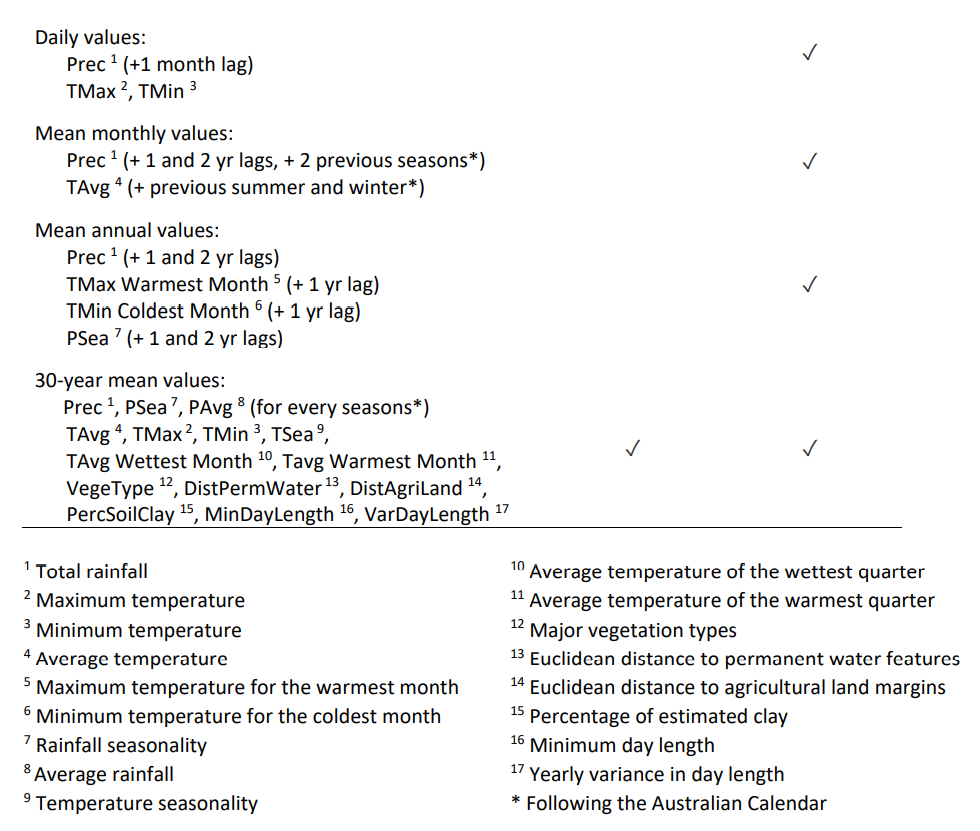

In [15]:
from IPython import display
display.Image("./Weather_features.png")

In [16]:
# Occurence dataset weather features (A_ -> Annual, M_ -> Month, D_ -> Day):
# 'A_Prec_Avg30Yr'       - Total rainfall (unit for precipitation is mm)
# 'A_Psea_Avg30Yr'       - Rainfall seasonality 
# 'A_TAvg_Avg30Yr'       - Avg temperature (unit for temperature is °C)
# 'A_TMax_Avg30Yr'       - Maximum temperature
# 'A_TMin_Avg30Yr'       - Minimum temperature
# 'A_TSea_Avg30Yr'       - Temperature seasonality
# 'A_TWet_Avg30Yr'       - Avg temperature of the wettest quarter
# 'A_TWrm_Avg30Yr'       - Avg temperature of the warmest quarter
# 'A_Prec_AvgAutumn30Yr' - Avg rainfall for Autumn
# 'A_Prec_AvgSummer30Yr' - Avg rainfall for Summer
# 'A_Prec_AvgSpring30Yr' - Avg rainfall for Spring
# 'A_Prec_AvgWinter30Yr' - Avg rainfall for Winter

# Abundance dataset weather features:
# 'D_Prec'                       - Avg Rainfall For the Same Day
# 'D_Prec_30DaysLag'             - Avg Rainfall For 30 Days Before the Sampling Date
# 'M_Prec'                       - Avg Rainfall For the Same Month of the Sampling Date
# 'M_Prec_12PreMonths'           - Avg Rainfall For the Same Month of the Sampling Date (1-year time lag)
# 'M_Prec_24PreMonths'           - Avg Rainfall For the Same Month of the Sampling Date (2-year time lag)
# 'M_Prec_2PresSeasons'          - Avg rainfall of the two previous seasons
# 'A_Prec'                       - Avg rainfall for the same year of the sampling date
# 'A_Prec_1YrLag'                - Avg rainfall for the same year of the sampling date (1-year time lag)
# 'A_Prec_2YrLag'                - Avg rainfall for the same year of the sampling date (2-year time lag)
# 'A_Psea'                       - Seasonal average rainfall for the current year of the data sampling 
# 'A_Psea_1YrLag'                - Seasonal average rainfall for the current year of the data sampling (1-year time lag) 
# 'A_Psea_2YrLag'                - Seasonal average rainfall for the current year of the data sampling (2-year time lag)
# 'D_Tmax'                       - Avg maximum temperature for the same day of the sampling date
# 'D_Tmin'                       - Avg minimum temperature for the same day of the sampling date 
# 'M_TAvg_PreSummer'             - Avg temperature for the previous summer season 
# 'M_TAvg_PreWinter'             - Avg temperature for the previous winter season
# 'A_AvgTMaxWarmestMonth'        - Avg maximum temperature for the warmest month for the same year the samplingdate
# 'A_AvgTMaxWarmestMonth_1YrLag' - Avg maximum temperature for the warmest month for the same year the samplingdate(1-y lag)
# 'A_AvgTMinColdestMonth'        - Avg minimum temperature for the coldest month for the same year the samplingdate 
# 'A_AvgTMinColdestMonth_1YrLag' - Avg minimum temperature for the coldest month for the same year the samplingdate(1-y lag)
# 'A_Prec_Avg30Yr'       - Total rainfall 
# 'A_Psea_Avg30Yr'       - Rainfall seasonality 
# 'A_TAvg_Avg30Yr'       - Average temperature
# 'A_TMax_Avg30Yr'       - Maximum temperature
# 'A_TMin_Avg30Yr'       - Minimum temperature
# 'A_TSea_Avg30Yr'       - Temperature seasonality
# 'A_TWet_Avg30Yr'       - Avg temperature of the wettest quarter
# 'A_TWrm_Avg30Yr'       - Avg temperature of the warmest quarter
# 'A_Prec_AvgAutumn30Yr' - Avg rainfall for Autumn
# 'A_Prec_AvgSummer30Yr' - Avg rainfall for Summer
# 'A_Prec_AvgSpring30Yr' - Avg rainfall for Spring
# 'A_Prec_AvgWinter30Yr' - Avg rainfall for Winter

In [17]:
# This is essentially all the weather data: Daily, Monthly, Seasonal, Annual, 30 years.
# Any other weather features are lagged versions of existing weather features.
# We should focus on the seasonal and annual weather features for our model.

print('                 #   min    max')
print('D_Prec:        ', abundance['D_Prec'].nunique(), abundance['D_Prec'].min(), abundance['D_Prec'].max())
print('M_Prec:        ', abundance['M_Prec'].nunique(), abundance['M_Prec'].min(), abundance['M_Prec'].max())
print('A_Psea:        ', abundance['A_Psea'].nunique(), abundance['A_Psea'].min(), abundance['A_Psea'].max())
print('A_Prec:        ', abundance['A_Prec'].nunique(), abundance['A_Prec'].min(), abundance['A_Prec'].max(),'\n')
print(pd.isna(abundance[['D_Prec']]).value_counts())
print(pd.isna(abundance[['M_Prec']]).value_counts())
print(pd.isna(abundance[['A_Psea']]).value_counts())
print(pd.isna(abundance[['A_Prec']]).value_counts(),'\n')

                 #   min    max
D_Prec:         627 0.0 60.51
M_Prec:         3226 0.0 317.19
A_Psea:         1904 26.07 291.35
A_Prec:         2222 37.6 2606.73 

D_Prec
False     42108
True       9133
dtype: int64
M_Prec
False     43227
True       8014
dtype: int64
A_Psea
False     48687
True       2554
dtype: int64
A_Prec
False     48687
True       2554
dtype: int64 



In [18]:
print('AustraliaState:', abundance['AustraliaState'].nunique())

# As you can see in the results below, the occurence dataset has one benefit over abundance:
# The sightings occur in more areas of Australia! This makes sense since transects are limited.

# The sighting distribution of the occurence dataset (Roy-Dufresne 8) covers more areas in
# Australia compared w/ sighting distribution of the abundance dataset (Roy-Dufresne 11).
# However, we can justify this since the Rabbit population is not evenly distributed across Australia.
# Since there is higher population density in Tasmania, Victoria, and New South Wales, the
# transects should be concentrated in these areas which is the case for the abundance dataset.

print('AustraliaUTMGrid10Km_ID:', abundance['AustraliaUTMGrid10Km_ID'].nunique())
print('AustraliaUTMGrid10Km_ID:', occurence['AustraliaUTMGrid10Km_ID'].nunique(),'\n')

# The amount of unique 30 year values is closely correlated w/ the 
# number of unique 10Km_IDs. Therefore, all weather data is location
# specific and not just the average of the whole continent.

print('ABUNDANCE VS OCCURENCE')
print('                 #   min    max')
print('A_Prec_Avg30Yr:', abundance['A_Prec_Avg30Yr'].nunique(), abundance['A_Prec_Avg30Yr'].min(), abundance['A_Prec_Avg30Yr'].max())
print('A_Prec_Avg30Yr:', occurence['A_Prec_Avg30Yr'].nunique(), occurence['A_Prec_Avg30Yr'].min(), occurence['A_Prec_Avg30Yr'].max(),'\n')

print(pd.isna(abundance[['A_Prec_Avg30Yr']]).value_counts())
print(pd.isna(occurence[['A_Prec_Avg30Yr']]).value_counts())

AustraliaState: 8
AustraliaUTMGrid10Km_ID: 302
AustraliaUTMGrid10Km_ID: 9839 

ABUNDANCE VS OCCURENCE
                 #   min    max
A_Prec_Avg30Yr: 299 154.48 1821.8
A_Prec_Avg30Yr: 8895 135.51 3270.03 

A_Prec_Avg30Yr
False             48687
True               2554
dtype: int64
A_Prec_Avg30Yr
False             649970
True               39295
dtype: int64


In [19]:
# As you can see below, the same Km_ID appears to give the same Avg30Yr values
abundance[['AustraliaUTMGrid10Km_ID','A_Prec_Avg30Yr','A_Psea_Avg30Yr','A_TMax_Avg30Yr','A_TSea_Avg30Yr']]

,AustraliaUTMGrid10Km_ID,A_Prec_Avg30Yr,A_Psea_Avg30Yr,A_TMax_Avg30Yr,A_TSea_Avg30Yr
0,55H0894,747.47,15.05,26.78,524.14
1,55H0412,654.82,14.26,31.44,572.24
2,56J3074,702.37,39.88,31.34,534.54
3,56J3074,702.37,39.88,31.34,534.54
4,56J1025,637.21,40.32,32.41,490.85
...,...,...,...,...,...
51236,54J4747,336.46,23.85,30.83,570.48
51237,54J4747,336.46,23.85,30.83,570.48
51238,54J4747,336.46,23.85,30.83,570.48
51239,54J4747,336.46,23.85,30.83,570.48


In [20]:
# Our hypothesis is validated below
print(abundance[['AustraliaUTMGrid10Km_ID','A_Prec_Avg30Yr','A_Psea_Avg30Yr','A_TMax_Avg30Yr','A_TSea_Avg30Yr']].nunique())

AustraliaUTMGrid10Km_ID    302
A_Prec_Avg30Yr             299
A_Psea_Avg30Yr             289
A_TMax_Avg30Yr             268
A_TSea_Avg30Yr             299
dtype: int64


In [21]:
# Pick a single Km_ID. Even though there are many rows, it only has one coresponding weather value per feature
proof_of_30yr_kmid=abundance[abundance['AustraliaUTMGrid10Km_ID']=='54J4747']
proof_of_30yr_kmid[['AustraliaUTMGrid10Km_ID','A_Prec_Avg30Yr','A_Psea_Avg30Yr','A_TMax_Avg30Yr','A_TSea_Avg30Yr']].nunique()

AustraliaUTMGrid10Km_ID    1
A_Prec_Avg30Yr             1
A_Psea_Avg30Yr             1
A_TMax_Avg30Yr             1
A_TSea_Avg30Yr             1
dtype: int64

In [22]:
# Before we select features for our model, there is one last
# feature to look into:
# 'QA_TemporalCoverage'

# According the the paper
# ...Temporal coverage is important for time series analyses. Therefore, for the 
# abundance dataset, we provide (i) the number of visits per year, (ii) the number 
# of seasons for which the site was visited per year, and (iii) the number of years 
# of sampling.

# The number of visits per year is calculated as the mode value over all years, 
# or the median if a different number of visits was made every year at the site.

# We also calculated the number of seasons the fieldwork was 
# carried out (by using mode value of the number of seasons per year)...(Roy-Dufresne 27)

# (Number of years calculated by obvious means)


# Since we are predicting by year and season, we want to make sure we are training using
# transects that are being visited throughout the four seasons throughout many years.
# Using transects that were visited at only 1971 and 1972, for example, doesn't help 
# much at all.

abundance['QA_TemporalCoverage'].unique()

array(['3.NA.4', '3.4.4', '3.2.1', '3.3.1', '3.2.3', '3.3.4', '4.4.4',
       '4.NA.4', '3.NA.3', '3.NA.1', '3.4.1', '3.4.3', '3.3.3', '3.4.2',
       '1.4.2', '2.2.1', '2.3.3', '3.3.2', '2.3.1', '2.3.2', '3.2.4',
       '4.4.3', '1.4.1', '1.3.2', '2.2.2', '4.4.1', '3.1.1', '2.4.1',
       '2.4.3', '2.4.2', '3.NA.2', '2.2.3', '1.2.2', '1.1.3', '1.3.1',
       '1.2.3', '1.3.3', '2.1.1', '4.NA.1', '4.4.2', '3.2.2', '2.4.4',
       '1.NA.NA', '3.NA.NA', '2.NA.NA', '4.NA.NA', '4.3.4', '3.1.2'],
      dtype=object)

In [23]:
abundance['QA_TemporalCoverage'].nunique()

48

In [24]:
total_rows=0

for i in range(0,4):
    for j in range(0,4):
        for k in range(0,4):
            temp=str(i+1)+'.'+str(j+1)+'.'+str(k+1)
            total_rows+=abundance[abundance['QA_TemporalCoverage']==temp].shape[0]
            print(temp,'is',abundance[abundance['QA_TemporalCoverage']==temp].shape[0])
print("\nThe total rows is",total_rows)
print("This is",(total_rows/(abundance.shape[0]))*100,"% of the abundance dataset.")
print("The other",100-(total_rows/(abundance.shape[0]))*100,"% has a NaN in one or more sections.")

1.1.1 is 0
1.1.2 is 0
1.1.3 is 94
1.1.4 is 0
1.2.1 is 0
1.2.2 is 135
1.2.3 is 15
1.2.4 is 0
1.3.1 is 1986
1.3.2 is 122
1.3.3 is 33
1.3.4 is 0
1.4.1 is 665
1.4.2 is 27
1.4.3 is 0
1.4.4 is 0
2.1.1 is 217
2.1.2 is 0
2.1.3 is 0
2.1.4 is 0
2.2.1 is 33
2.2.2 is 242
2.2.3 is 112
2.2.4 is 0
2.3.1 is 195
2.3.2 is 22
2.3.3 is 316
2.3.4 is 0
2.4.1 is 1823
2.4.2 is 40
2.4.3 is 66
2.4.4 is 16
3.1.1 is 3285
3.1.2 is 245
3.1.3 is 0
3.1.4 is 0
3.2.1 is 1700
3.2.2 is 890
3.2.3 is 1001
3.2.4 is 20
3.3.1 is 9268
3.3.2 is 2381
3.3.3 is 1938
3.3.4 is 76
3.4.1 is 11702
3.4.2 is 3463
3.4.3 is 1216
3.4.4 is 202
4.1.1 is 0
4.1.2 is 0
4.1.3 is 0
4.1.4 is 0
4.2.1 is 0
4.2.2 is 0
4.2.3 is 0
4.2.4 is 0
4.3.1 is 0
4.3.2 is 0
4.3.3 is 0
4.3.4 is 6
4.4.1 is 60
4.4.2 is 36
4.4.3 is 248
4.4.4 is 386

The total rows is 44282
This is 86.4190784723171 % of the abundance dataset.
The other 13.580921527682904 % has a NaN in one or more sections.


In [25]:
# Which values do we want for our dataset?
# Lets break down the meanings of the numbers:

# A. Frequency of visit:
#    1    >= 6 times
#    2    5-6 times
#    3    2-4 times
#    4    <=1 time

# B. Season frequency:
#    1    4 seasons
#    2    3 seasons
#    3    2 seasons
#    4    1 season

# C. Year(s) covered:
#    1    >5 years
#    2    4-5 years
#    3    2-3 years
#    4    <=1 year

# A. ***>=2 times which translates to A<=3*** 
# Preferably, we would want A. to be >4 times but we can settle w/ 
# >=2 since a huge portion of the dataset is in 2-4.

# B. ***4 seasons which translates to B=1***
# We want B. to be 4 seasons but if it's too few rows we can expand 
# to include 2 or even 3.

# C. ***>=4 years which translates to C<=2***
# 4 years is a decent amount to work w/


# Lets see how many rows we're left w/ when applying these conditions:

total_rows=0

for A in range(1,5):
    if(A==4):
        continue
    for B in range(1,5):
        if(B>=2):
            continue
        for C in range(1,5):
            if(C>=3):
                continue
            temp=str(A)+'.'+str(B)+'.'+str(C)
            total_rows+=abundance[abundance['QA_TemporalCoverage']==temp].shape[0]
            print(temp,'is',abundance[abundance['QA_TemporalCoverage']==temp].shape[0])
print("\nThe total rows is",total_rows)
print("This is",(total_rows/(abundance.shape[0]))*100,"% of the abundance dataset.")
print("The other",100-(total_rows/(abundance.shape[0]))*100,"% has a NaN in one or more sections.")

1.1.1 is 0
1.1.2 is 0
2.1.1 is 217
2.1.2 is 0
3.1.1 is 3285
3.1.2 is 245

The total rows is 3747
This is 7.312503659179173 % of the abundance dataset.
The other 92.68749634082083 % has a NaN in one or more sections.


In [26]:
# 7.3% is far too low!
# Lets adjust our specifications:

# A. ***>=2 times which translates to A<=3*** 

# B. ***4 seasons which translates to B=1*** -----------> ***3 or more seasons which translates to B<=2***

# C. ***>=4 years which translates to C<=2*** ----------> ***>=2 years which translates to C<=3***

total_rows=0

for A in range(1,5):
    if(A==4):
        continue
    for B in range(1,5):
        if(B>=3):
            continue
        for C in range(1,5):
            if(C==4):
                continue
            temp=str(A)+'.'+str(B)+'.'+str(C)
            total_rows+=abundance[abundance['QA_TemporalCoverage']==temp].shape[0]
            print(temp,'is',abundance[abundance['QA_TemporalCoverage']==temp].shape[0])
print("\nThe total rows is",total_rows)
print("This is",(total_rows/(abundance.shape[0]))*100,"% of the abundance dataset.")
print("The other",100-(total_rows/(abundance.shape[0]))*100,"% has a NaN in one or more sections.")

1.1.1 is 0
1.1.2 is 0
1.1.3 is 94
1.2.1 is 0
1.2.2 is 135
1.2.3 is 15
2.1.1 is 217
2.1.2 is 0
2.1.3 is 0
2.2.1 is 33
2.2.2 is 242
2.2.3 is 112
3.1.1 is 3285
3.1.2 is 245
3.1.3 is 0
3.2.1 is 1700
3.2.2 is 890
3.2.3 is 1001

The total rows is 7969
This is 15.551999375500088 % of the abundance dataset.
The other 84.44800062449991 % has a NaN in one or more sections.


In [27]:
# We can do better than 15%.
# Lets make one final adjustment.

# B. ***3 or more seasons which translates to B<=2*** ----------> ***2 or more seasons which translates to B<=3***

total_rows=0
QATC=[]

for A in range(1,5):
    if(A==4):
        continue
    for B in range(1,5):
        if(B==4):
            continue
        for C in range(1,5):
            if(C==4):
                continue
            temp=str(A)+'.'+str(B)+'.'+str(C)
            QATC.append(temp)
            total_rows+=abundance[abundance['QA_TemporalCoverage']==temp].shape[0]
            print(temp,'is',abundance[abundance['QA_TemporalCoverage']==temp].shape[0])
print("\nThe total rows is",total_rows)
print("This is",(total_rows/(abundance.shape[0]))*100,"% of the abundance dataset.")
print("The other",100-(total_rows/(abundance.shape[0]))*100,"% has a NaN in one or more sections.")

1.1.1 is 0
1.1.2 is 0
1.1.3 is 94
1.2.1 is 0
1.2.2 is 135
1.2.3 is 15
1.3.1 is 1986
1.3.2 is 122
1.3.3 is 33
2.1.1 is 217
2.1.2 is 0
2.1.3 is 0
2.2.1 is 33
2.2.2 is 242
2.2.3 is 112
2.3.1 is 195
2.3.2 is 22
2.3.3 is 316
3.1.1 is 3285
3.1.2 is 245
3.1.3 is 0
3.2.1 is 1700
3.2.2 is 890
3.2.3 is 1001
3.3.1 is 9268
3.3.2 is 2381
3.3.3 is 1938

The total rows is 24230
This is 47.28635272535665 % of the abundance dataset.
The other 52.71364727464335 % has a NaN in one or more sections.


In [28]:
# 50% is a good number!
# Lets slice the abundance dataframe to satisfy these specifications.

# A. ***>=2 times which translates to A<=3*** 

# B. ***2 or more seasons which translates to B<=3***

# C. ***>=2 years which translates to C<=3***

# QATC is the list of all relevant strings

abundance=abundance[(abundance['QA_TemporalCoverage']==QATC[0])
                    | (abundance['QA_TemporalCoverage']==QATC[1])\
                    | (abundance['QA_TemporalCoverage']==QATC[2])\
                    | (abundance['QA_TemporalCoverage']==QATC[3])\
                    | (abundance['QA_TemporalCoverage']==QATC[4])\
                    | (abundance['QA_TemporalCoverage']==QATC[5])\
                    | (abundance['QA_TemporalCoverage']==QATC[6])\
                    | (abundance['QA_TemporalCoverage']==QATC[7])\
                    | (abundance['QA_TemporalCoverage']==QATC[8])\
                    | (abundance['QA_TemporalCoverage']==QATC[9])\
                    | (abundance['QA_TemporalCoverage']==QATC[10])\
                    | (abundance['QA_TemporalCoverage']==QATC[11])\
                    | (abundance['QA_TemporalCoverage']==QATC[12])\
                    | (abundance['QA_TemporalCoverage']==QATC[13])\
                    | (abundance['QA_TemporalCoverage']==QATC[14])\
                    | (abundance['QA_TemporalCoverage']==QATC[15])\
                    | (abundance['QA_TemporalCoverage']==QATC[16])\
                    | (abundance['QA_TemporalCoverage']==QATC[17])\
                    | (abundance['QA_TemporalCoverage']==QATC[18])\
                    | (abundance['QA_TemporalCoverage']==QATC[19])\
                    | (abundance['QA_TemporalCoverage']==QATC[20])\
                    | (abundance['QA_TemporalCoverage']==QATC[21])\
                    | (abundance['QA_TemporalCoverage']==QATC[22])\
                    | (abundance['QA_TemporalCoverage']==QATC[23])\
                    | (abundance['QA_TemporalCoverage']==QATC[24])\
                    | (abundance['QA_TemporalCoverage']==QATC[25])\
                    | (abundance['QA_TemporalCoverage']==QATC[26])]

In [29]:
abundance.shape[0]

24230

In [30]:
# For our model, we want to predict the future rabbit sightings for the next year per season.
# Knowing the average from the past 30 years DOES NOT help the model.
# Even though data exploration should be limited to the features below,
# its a good idea to do some data exploration on the 30 year values on the transects.
# Gives us a general idea on the weather conditions in such areas.


# Here are the useful weather features:
# 'M_TAvg_PreSummer'             - Avg temperature for the previous summer season 
# 'M_TAvg_PreWinter'             - Avg temperature for the previous winter season
# 'M_Prec_2PresSeasons'          - Avg rainfall of the two previous seasons
# 'A_Prec'                       - Avg rainfall for the same year of the sampling date
# 'A_Prec_1YrLag'                - Avg rainfall for the same year of the sampling date (1-year time lag)
# 'A_Prec_2YrLag'                - Avg rainfall for the same year of the sampling date (2-year time lag)
# 'A_Psea'                       - Seasonal average rainfall for the current year of the data sampling 
# 'A_Psea_1YrLag'                - Seasonal average rainfall for the current year of the data sampling (1-year time lag) 
# 'A_Psea_2YrLag'                - Seasonal average rainfall for the current year of the data sampling (2-year time lag)

# However, the paper cites that there are decent correlations between weather and rabbit sightings.
# Alrady knowing the weather at the particular season we are trying to predict already gives
# a glimpse into the 'season_population' feature we're trying to predict. It's time traveling.
# Therefore, we limit our weather features to: 
# 'M_TAvg_PreSummer'             - Avg temperature for the previous summer season 
# 'M_TAvg_PreWinter'             - Avg temperature for the previous winter season
# 'M_Prec_2PresSeasons'          - Avg rainfall of the two previous seasons
# 'A_Prec_1YrLag'                - Avg rainfall for the same year of the sampling date (1-year time lag)
# 'A_Prec_2YrLag'                - Avg rainfall for the same year of the sampling date (2-year time lag) 
# 'A_Psea_1YrLag'                - Seasonal average rainfall for the current year of the data sampling (1-year time lag) 
# 'A_Psea_2YrLag'                - Seasonal average rainfall for the current year of the data sampling (2-year time lag)

# The non-weather features that are important is as follows: 
# 'Year'
# 'Season'
# 'AustraliaUTMGrid10Km_ID'
# 'Transect_ID'
# 'TransectWidth' 
# 'TransectLength' 
# 'VegeType' 
# 'DistPermWater' 
# 'DistAgriLand' 
# 'PercSoilClay'

# And, of course, our target:
# 'RabbitsPerKm'

# However, we will need to transform this feature to represent
# the total rabbit sightings for the entire season rather than
# at that particular night. Then, the feature will be renamed to:
# 'season_population'. Lets also lag this feature to be t-1 and
# t-2.

# Later on in this project, we can do multivariate forecasting and
# try to forecast 'A_Prec' and 'A_Psea' but I won't get ahead of
# myself.

# Given that the abundance data occurs from 1965 to 2015 (Roy-Dufresne 8),
# this is a total of 50 years. Since there are 4 seasons in a year and 
# 308 transects, our final dataset should have a total of approximately:
# 61,600 rows.


uni_population_growth=abundance[['Year','Season','AustraliaUTMGrid10Km_ID','Transect_ID','AustraliaUTMGrid10Km_Long',
                                 'AustraliaUTMGrid10Km_Lat','TransectWidth','TransectLength','VegeType','DistPermWater',
                                 'DistAgriLand','PercSoilClay','M_TAvg_PreSummer','M_TAvg_PreWinter','M_Prec_2PresSeasons',
                                 'A_Prec_1YrLag','A_Prec_2YrLag','A_Psea_1YrLag','A_Psea_2YrLag','RabbitsPerKm']]
uni_population_growth

,Year,Season,AustraliaUTMGrid10Km_ID,Transect_ID,AustraliaUTMGrid10Km_Long,AustraliaUTMGrid10Km_Lat,TransectWidth,TransectLength,VegeType,DistPermWater,DistAgriLand,PercSoilClay,M_TAvg_PreSummer,M_TAvg_PreWinter,M_Prec_2PresSeasons,A_Prec_1YrLag,A_Prec_2YrLag,A_Psea_1YrLag,A_Psea_2YrLag,RabbitsPerKm
192,2013.0,4.0,55H0593,NaN,149.25,-32.95,100.0,10.0,8,0.96,1.69,13.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.300
193,2013.0,4.0,55H0593,NaN,149.25,-32.95,100.0,10.0,8,0.96,1.69,13.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.700
194,2013.0,4.0,55H0593,NaN,149.25,-32.95,100.0,10.0,8,0.96,1.69,13.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.500
195,2014.0,1.0,55H0593,NaN,149.25,-32.95,100.0,10.0,8,0.96,1.69,13.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.400
196,2014.0,1.0,55H0593,NaN,149.25,-32.95,100.0,10.0,8,0.96,1.69,13.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51236,2002.0,3.0,54J4747,3Creeks,138.65,-31.95,100.0,2.3,4,4.52,14.11,28.91,22.153,9.148,8.264,368.47,426.79,81.25,58.10,2.174
51237,2002.0,3.0,54J4747,3Creeks,138.65,-31.95,100.0,5.6,4,4.52,14.11,28.91,22.153,9.148,8.264,368.47,426.79,81.25,58.10,6.786
51238,2002.0,4.0,54J4747,3Creeks,138.65,-31.95,100.0,22.3,4,4.52,14.11,28.91,21.419,11.491,22.571,368.47,426.79,81.25,58.10,1.659
51239,2002.0,4.0,54J4747,3Creeks,138.65,-31.95,100.0,0.5,4,4.52,14.11,28.91,21.419,11.491,22.571,368.47,426.79,81.25,58.10,6.000


In [31]:
# When trying to look for NaN values, better to start looking at the most important features
# If there is missing data in these important features, the only solution is to remove the rows.

print(pd.isna(uni_population_growth[['Year']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['Season']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['AustraliaUTMGrid10Km_ID']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['Transect_ID']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['AustraliaUTMGrid10Km_Long']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['AustraliaUTMGrid10Km_Lat']]).value_counts(),'\n')

Year 
False    24230
dtype: int64 

Season
False     24212
True         18
dtype: int64 

AustraliaUTMGrid10Km_ID
False                      24230
dtype: int64 

Transect_ID
False          21844
True            2386
dtype: int64 

AustraliaUTMGrid10Km_Long
False                        24230
dtype: int64 

AustraliaUTMGrid10Km_Lat
False                       24230
dtype: int64 



In [32]:
# Remove all NaNs from 'Season'
uni_population_growth=uni_population_growth[uni_population_growth['Season'].notna()]

In [33]:
print(pd.isna(uni_population_growth[['Year']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['Season']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['AustraliaUTMGrid10Km_ID']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['Transect_ID']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['AustraliaUTMGrid10Km_Long']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['AustraliaUTMGrid10Km_Lat']]).value_counts(),'\n')

Year 
False    24212
dtype: int64 

Season
False     24212
dtype: int64 

AustraliaUTMGrid10Km_ID
False                      24212
dtype: int64 

Transect_ID
False          21838
True            2374
dtype: int64 

AustraliaUTMGrid10Km_Long
False                        24212
dtype: int64 

AustraliaUTMGrid10Km_Lat
False                       24212
dtype: int64 



In [34]:
# Remove all nan Transect_IDs.
uni_population_growth=uni_population_growth[uni_population_growth['Transect_ID'].notna()]

In [35]:
# All important feature no longer have nans, great.
print(pd.isna(uni_population_growth[['Year']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['Season']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['AustraliaUTMGrid10Km_ID']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['Transect_ID']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['AustraliaUTMGrid10Km_Long']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['AustraliaUTMGrid10Km_Lat']]).value_counts(),'\n')

Year 
False    21838
dtype: int64 

Season
False     21838
dtype: int64 

AustraliaUTMGrid10Km_ID
False                      21838
dtype: int64 

Transect_ID
False          21838
dtype: int64 

AustraliaUTMGrid10Km_Long
False                        21838
dtype: int64 

AustraliaUTMGrid10Km_Lat
False                       21838
dtype: int64 



In [36]:
# The other features can have the nans plugged in w/ zeroes
# so long as not too many nans. Lets see how many nans.
print(pd.isna(uni_population_growth[['TransectWidth']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['TransectLength']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['VegeType']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['DistPermWater']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['DistAgriLand']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['PercSoilClay']]).value_counts(),'\n')

print(pd.isna(uni_population_growth[['M_TAvg_PreSummer']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['M_TAvg_PreWinter']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['M_Prec_2PresSeasons']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['A_Prec_1YrLag']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['A_Prec_2YrLag']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['A_Psea_1YrLag']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['A_Psea_2YrLag']]).value_counts(),'\n')

print(pd.isna(uni_population_growth[['RabbitsPerKm']]).value_counts(),'\n')

TransectWidth
False            16498
True              5340
dtype: int64 

TransectLength
False             21838
dtype: int64 

VegeType
False       21838
dtype: int64 

DistPermWater
False            21838
dtype: int64 

DistAgriLand
False           21838
dtype: int64 

PercSoilClay
False           21838
dtype: int64 

M_TAvg_PreSummer
False               20344
True                 1494
dtype: int64 

M_TAvg_PreWinter
False               20350
True                 1488
dtype: int64 

M_Prec_2PresSeasons
False                  20416
True                    1422
dtype: int64 

A_Prec_1YrLag
False            20442
True              1396
dtype: int64 

A_Prec_2YrLag
False            20442
True              1396
dtype: int64 

A_Psea_1YrLag
False            20442
True              1396
dtype: int64 

A_Psea_2YrLag
False            20442
True              1396
dtype: int64 

RabbitsPerKm
False           21838
dtype: int64 



In [37]:
# Almost a quarter of entries in 'TransectWidth' are nans. Too many. Remove this feature.
uni_population_growth=uni_population_growth.drop(columns=['TransectWidth'])
print(uni_population_growth.shape[1])

# Nearly all of the weather features have the same number of nans missing: 2417.
# Removing the nans from one weather feature should fix the rest.
uni_population_growth=uni_population_growth[uni_population_growth['M_TAvg_PreSummer'].notna()]

19


In [38]:
# All is well... except for one feature. Quickly fix
print(pd.isna(uni_population_growth[['M_TAvg_PreWinter']]).value_counts(),'\n\n')
uni_population_growth=uni_population_growth[uni_population_growth['M_TAvg_PreWinter'].notna()]

print(pd.isna(uni_population_growth[['TransectLength']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['VegeType']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['DistPermWater']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['DistAgriLand']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['PercSoilClay']]).value_counts(),'\n')

print(pd.isna(uni_population_growth[['M_TAvg_PreSummer']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['M_TAvg_PreWinter']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['M_Prec_2PresSeasons']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['A_Prec_1YrLag']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['A_Prec_2YrLag']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['A_Psea_1YrLag']]).value_counts(),'\n')
print(pd.isna(uni_population_growth[['A_Psea_2YrLag']]).value_counts(),'\n')

print(pd.isna(uni_population_growth[['RabbitsPerKm']]).value_counts(),'\n')

M_TAvg_PreWinter
False               20338
True                    6
dtype: int64 


TransectLength
False             20338
dtype: int64 

VegeType
False       20338
dtype: int64 

DistPermWater
False            20338
dtype: int64 

DistAgriLand
False           20338
dtype: int64 

PercSoilClay
False           20338
dtype: int64 

M_TAvg_PreSummer
False               20338
dtype: int64 

M_TAvg_PreWinter
False               20338
dtype: int64 

M_Prec_2PresSeasons
False                  20338
dtype: int64 

A_Prec_1YrLag
False            20338
dtype: int64 

A_Prec_2YrLag
False            20338
dtype: int64 

A_Psea_1YrLag
False            20338
dtype: int64 

A_Psea_2YrLag
False            20338
dtype: int64 

RabbitsPerKm
False           20338
dtype: int64 



In [39]:
# Categorical features like 'Vegetype' and 'Season' should be one-hot-encoded.

# ...
# Factor level: 1 (Summer: Jan, Feb, Mar), 
#               2 (Autumn: Apr, May, Jun), 
#               3 (Winter: Jul, Aug, Sep), 
#               4 (Spring: Oct, Nov, Dec)
# (Roy-Dufresne 41)...

# Ok, that's awful.
# Lets classify the seasons based off of the American Calendar:
# Factor level: 1 (Winter: Jan, Feb, Mar), 
#               2 (Spring: Apr, May, Jun), 
#               3 (Summer: Jul, Aug, Sep), 
#               4 (Autumn: Oct, Nov, Dec)
print(uni_population_growth['Season'].unique())

# ...
# We re-classified the VegeType variable into 13 categories:
# 1 (rainforest and vine thicket)
#      2 (eucalyptus forest)
#      3 (eucalyptus woodland)
#      4 (other woodlands)
# 5 (inundated swamps, salt marshes, other grasslands)
# 6 (low-closed forests and tall closed shrublands)
#      7 (shrublands)
#      8 (tussock grasslands)
#      9 (hummock grasslands)
#     10 (shrublands)
#     11 (inland aquatic, water, lakes, lagoons)
# 12 (cleared vegetation, buildings, rocks, bare areas)
# 13 (unclassified and unknown features)
print(uni_population_growth['VegeType'].unique())

[2. 3. 4. 1.]
[ 8 11  2  3  7  9 10  4]


In [40]:
# Now we have to replace 'RabbitsPerKm' w/ the 'season_population' feature
# and add it's lagged versions.

# 'RabbitsPerKm' - daily
# 'season_population' - season in a year

# The goal here is to calculate the total rabbit population per year-season-grid-transect.
# To get this, we use the following formula: SUM([RabbitsPerKm_1 * TransectLength_1], ... , [RabbitsPerKm_N * TransectLength_N])
# For the summation, the records where grouped by 'Year','Season','AustraliaUTMGrid10Km_ID', and 'Transect_ID'

uni_population_growth['number_sightings'] = uni_population_growth['RabbitsPerKm']*uni_population_growth['TransectLength']
uni_population_growth['season_population'] = uni_population_growth.groupby(['Year','Season','AustraliaUTMGrid10Km_ID','Transect_ID'])['number_sightings'].transform(np.sum)
del uni_population_growth['RabbitsPerKm']
del uni_population_growth['number_sightings']

uni_population_growth=uni_population_growth.groupby(['Year','Season','AustraliaUTMGrid10Km_ID','Transect_ID',\
                                                     'AustraliaUTMGrid10Km_Long','AustraliaUTMGrid10Km_Lat',\
                                                     'TransectLength','VegeType','DistPermWater','DistAgriLand',\
                                                     'PercSoilClay']).mean().reset_index()
uni_population_growth.sort_values(['Year','Season','Transect_ID'])

,Year,Season,AustraliaUTMGrid10Km_ID,Transect_ID,AustraliaUTMGrid10Km_Long,AustraliaUTMGrid10Km_Lat,TransectLength,VegeType,DistPermWater,DistAgriLand,PercSoilClay,M_TAvg_PreSummer,M_TAvg_PreWinter,M_Prec_2PresSeasons,A_Prec_1YrLag,A_Prec_2YrLag,A_Psea_1YrLag,A_Psea_2YrLag,season_population
0,1971.0,2.0,54H0071,C1,139.05,-32.15,8.0,10,2.82,55.88,30.00,23.3278,9.086000,37.854600,306.50,306.50,82.87,82.87,36.0000
2,1971.0,2.0,54H0128,C1,138.75,-32.25,8.0,4,5.35,35.73,27.60,23.2970,9.061333,32.258333,338.82,338.82,70.66,70.66,55.0000
1,1971.0,2.0,54H0071,C2,139.05,-32.15,8.0,10,2.82,55.88,30.00,23.3278,9.086000,37.854600,306.50,306.50,82.87,82.87,40.0000
3,1971.0,2.0,54H0128,C2,138.75,-32.25,8.0,4,5.35,35.73,27.60,23.2970,9.061333,32.258333,338.82,338.82,70.66,70.66,79.0000
4,1971.0,4.0,54H0071,C1,139.05,-32.15,8.0,10,2.82,55.88,30.00,23.2970,9.061333,10.717000,306.50,306.50,82.87,82.87,14.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9138,2012.0,4.0,55H3423,9,144.25,-37.75,0.5,11,0.40,1.51,15.67,19.4000,7.606000,36.404000,820.26,783.92,61.91,53.20,14.0000
9163,2012.0,4.0,55H3870,9,146.95,-38.45,0.6,11,5.06,1.47,8.44,21.6350,9.373000,19.504000,831.23,618.16,42.65,42.51,16.9998
8871,2012.0,4.0,54H1351,HwyNth,141.05,-34.25,27.0,4,4.72,6.25,22.26,23.5900,10.141000,12.161000,475.42,502.54,93.06,79.10,0.9990
8916,2012.0,4.0,54H2021,Timberoo,142.05,-35.35,16.0,11,2.51,1.08,8.66,23.5900,10.141000,12.161000,441.44,482.26,84.89,73.28,28.0130


In [41]:
# The dataset is as expected. I didn't accidently manipulate the weather features. 
# There is different weather data for the same location in the same time.
result= abundance[(abundance['Year'] == 1975) & \
                  (abundance['Season'] == 2.0) & \
                  (abundance['AustraliaUTMGrid10Km_ID'] == '54H0128') & \
                  (abundance['Transect_ID'] == 'C1')]

result[['Year','Season','AustraliaUTMGrid10Km_ID','Transect_ID','TransectWidth',
                           'TransectLength','VegeType','DistPermWater','DistAgriLand','PercSoilClay',
                           'M_TAvg_PreSummer','M_TAvg_PreWinter','M_Prec_2PresSeasons','A_Prec_1YrLag','A_Prec_2YrLag',
                           'A_Psea_1YrLag','A_Psea_2YrLag','RabbitsPerKm']]

,Year,Season,AustraliaUTMGrid10Km_ID,Transect_ID,TransectWidth,TransectLength,VegeType,DistPermWater,DistAgriLand,PercSoilClay,M_TAvg_PreSummer,M_TAvg_PreWinter,M_Prec_2PresSeasons,A_Prec_1YrLag,A_Prec_2YrLag,A_Psea_1YrLag,A_Psea_2YrLag,RabbitsPerKm
9380,1975.0,2.0,54H0128,C1,100.0,8.0,4,5.35,35.73,27.6,23.239,10.103,27.078,694.43,541.72,87.46,71.37,3.250
9381,1975.0,2.0,54H0128,C1,100.0,8.0,4,5.35,35.73,27.6,23.239,10.103,27.078,694.43,541.72,87.46,71.37,2.000
9382,1975.0,2.0,54H0128,C1,100.0,8.0,4,5.35,35.73,27.6,23.239,10.103,99.913,694.43,541.72,87.46,71.37,1.750
9383,1975.0,2.0,54H0128,C1,100.0,8.0,4,5.35,35.73,27.6,23.239,10.103,68.787,694.43,541.72,87.46,71.37,2.125


In [42]:
# We are getting different UTMGrids for the same transect... how can this be?
uni_population_growth.head(20)

,Year,Season,AustraliaUTMGrid10Km_ID,Transect_ID,AustraliaUTMGrid10Km_Long,AustraliaUTMGrid10Km_Lat,TransectLength,VegeType,DistPermWater,DistAgriLand,PercSoilClay,M_TAvg_PreSummer,M_TAvg_PreWinter,M_Prec_2PresSeasons,A_Prec_1YrLag,A_Prec_2YrLag,A_Psea_1YrLag,A_Psea_2YrLag,season_population
0,1971.0,2.0,54H0071,C1,139.05,-32.15,8.0,10,2.82,55.88,30.0,23.3278,9.086000,37.854600,306.50,306.50,82.87,82.87,36.0
1,1971.0,2.0,54H0071,C2,139.05,-32.15,8.0,10,2.82,55.88,30.0,23.3278,9.086000,37.854600,306.50,306.50,82.87,82.87,40.0
2,1971.0,2.0,54H0128,C1,138.75,-32.25,8.0,4,5.35,35.73,27.6,23.2970,9.061333,32.258333,338.82,338.82,70.66,70.66,55.0
3,1971.0,2.0,54H0128,C2,138.75,-32.25,8.0,4,5.35,35.73,27.6,23.2970,9.061333,32.258333,338.82,338.82,70.66,70.66,79.0
4,1971.0,4.0,54H0071,C1,139.05,-32.15,8.0,10,2.82,55.88,30.0,23.2970,9.061333,10.717000,306.50,306.50,82.87,82.87,14.0
5,1971.0,4.0,54H0071,C2,139.05,-32.15,8.0,10,2.82,55.88,30.0,23.2970,9.061333,10.717000,306.50,306.50,82.87,82.87,17.0
6,1971.0,4.0,54H0128,C1,138.75,-32.25,8.0,4,5.35,35.73,27.6,23.2585,9.030500,15.866000,338.82,338.82,70.66,70.66,19.0
7,1971.0,4.0,54H0128,C2,138.75,-32.25,8.0,4,5.35,35.73,27.6,23.2585,9.030500,15.866000,338.82,338.82,70.66,70.66,50.0
8,1972.0,1.0,54H0071,C1,139.05,-32.15,8.0,10,2.82,55.88,30.0,23.3740,10.225000,3.751000,306.50,306.50,82.87,82.87,51.0
9,1972.0,1.0,54H0071,C2,139.05,-32.15,8.0,10,2.82,55.88,30.0,23.3740,10.225000,3.751000,306.50,306.50,82.87,82.87,61.0


In [43]:
# Taking a look at uncertainty management notes... a feature from abundance
# Perhaps reading it will provide some insight.
# ... No, not very useful
print(abundance['UncertaintyManagementNotes'].unique())
abundance['UncertaintyManagementNotes'].nunique()

[nan 'Wind_50km/hr' 'Drizzle' 'NoCount_due_to_illness' 'Rain'
 'Wind_30km/hr' 'High_veg_cover' 'High_veg_cover_&_wind_strong'
 'NoCount_interrupted' 'NoCount' 'High_predators_number_(cats&foxes)'
 'High_veg_cover_&_high cats_number' 'Pre-poisoning'
 'BaitStation_post-poisoned' 'Unripped' 'No_ripped' 'No_treatment'
 '2004_Ripped' '2003-2004_Ripped' 'Post-shooting' 'Post-RCD' 'Poisoned'
 'Post-RHD_&_poisoning' 'BaitStation_poisoned' 'Pre-RHD'
 'Post-treatment_control' 'Ripped_fumigated_poisonned'
 'No_fleas_releashed' 'Fleas_releashed'
 'Nov1996_RCD_&_Sep1997_RCD_&_Feb1998_RCD' 'Oct1996_RCD_Dec1997_RCD'
 '1968_Warrens_ripped_&_1976_Fleas_releashed_&_1983_Warrens_ripped'
 'Data_collected_during_foxes_monitoring'
 'April2001_Ripped_&_May2001_fumigation_explosives'
 'March1992_Ripped_&_fumigation_explosives' '1970_Fleas_releashed'
 '1998-2002_Ripping_program_&_no_Myxo_rabbits'
 '1998-2002_Ripping_program_&_<5%_Myxo_rabbits'
 '1998-2002_Ripping_program_&_<10%_Myxo_rabbits'
 '1998-2002_Rippin

49

In [44]:
# Not only can transects be in more than one 10km location, but
# (as shown below) one 10km can have multiple transects.
# 145 transects among 66 10 km locations.

# For our dataset, each transect can only have one 10 km location.
# The first point is a problem. However, having multiple transects
# in the same 10 km ID isn't really an issue... now we know that
# the transects are close together.

print(uni_population_growth['Transect_ID'].unique())
print(uni_population_growth['Transect_ID'].nunique())
print(uni_population_growth['AustraliaUTMGrid10Km_ID'].unique())
print(uni_population_growth['AustraliaUTMGrid10Km_ID'].nunique())
example_432=uni_population_growth[['AustraliaUTMGrid10Km_Long','AustraliaUTMGrid10Km_Lat']]
example_432

['C1' 'C2' '6' '1' '2' '3' '4' '5' '7' '8' '9' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28'
 '29' '30' '31' '32' '33' '34' 'HwyNth' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H'
 'I' 'J' 'Pawelski' 'Z' '139' '35' '40' '36' '37' '38' 'Balingup'
 'Irishtown' 'Boothendara_Rd' 'BR1' 'BR2' 'MR1' 'SB1' 'SB2' 'SB3' 'WR1'
 'WR2' 'WR3' '139A' '139B' '139_Road' 'Village' 'Bush1' 'Bush2' '179A'
 'Venus_Bay_2' 'Pt_Kenny_3' 'Beach_rd' 'Smiths' 'Kelsh/pk_bound'
 'Avondale ' '3Creeks' '2R' '2U' '3R' '3U' '4R' '4U' 'RCV' 'Elliston'
 'Lock' '1U' 'Ceduna' 'Streaky_Bay' 'Wudinna' 'Y' '39' 'na10' 'na11'
 'na12' 'na4' 'na9' 'LG1' 'LG10' 'LG11' 'LG12' 'LG13' 'LG14' 'LG2' 'LG3'
 'LG4' 'LG5' 'LG6' 'LG7' 'LG8' 'LG9' 'YO1' 'NA1' 'NA10' 'NA11' 'NA12'
 'NA2' 'NA3' 'NA4' 'NA6' 'NA7' 'NA8' 'NA9' 'YL1' 'YL2' 'YL3' 'YL4' 'YO5'
 'YL13' 'YL14' 'YL5' 'YL6' 'YL8' 'NA5' 'c1' 'c2' 'c3' 'c4' 'c5' 'c6'
 'Timberoo']
145
['54H0071' '54H0128' '53J1211' '53J0848' '52K4135' '53J0618' '53K4405'

,AustraliaUTMGrid10Km_Long,AustraliaUTMGrid10Km_Lat
0,139.05,-32.15
1,139.05,-32.15
2,138.75,-32.25
3,138.75,-32.25
4,139.05,-32.15
...,...,...
9159,146.95,-38.45
9160,146.95,-38.45
9161,146.95,-38.45
9162,146.95,-38.45


In [45]:
example_432.drop_duplicates()

,AustraliaUTMGrid10Km_Long,AustraliaUTMGrid10Km_Lat
0,139.05,-32.15
2,138.75,-32.25
136,133.05,-26.05
151,132.75,-25.45
178,131.45,-22.85
...,...,...
6661,116.85,-31.85
6731,119.05,-31.25
7029,115.65,-29.95
7031,115.75,-29.95


In [46]:
# The Transect_ID is so unreliable.
# Not only can the same Transect_ID have multiple lengths,
# but it can also cover many 10Km_ID's. If a transect can 
# be in more than one place at once whilst having a varying 
# size, the ID serves no use in the dataset.

# Earlier, we sliced the dataset to consist of transects 
# that were visited frequently over a long period of time.
# As a result, we can remove the Transect_ID's knowing 
# that researchers visited similar locations over time. 
# This still gives consistency in the dataset. We can also 
# drop AustraliaUTMGrid10Km_ID as it is also unnecessary.

# Now, we will transition to using latitude and longitude 
# coordinates. Not only are they continuous features, but 
# they allow us to make some assumptions:

# Although there may be more than one transect in some 
# latitude+longitude coordinates, they will likely
# share a similar transect length and weather/geo
# features so its fine.

# If the same transect has different lengths, observations
# of the same transect shouldn't be combined. According to profe-
# ssional guidelines on transect spotlight surveys:
# "Use the same Route, Time, Rate of Travel, Spotlight
# Power, Observer, and Vehicle [per survey]" (Mitchell 10).
# A different length for the same transect means a different
# researcher(s) doing a survey for the path. Their survey
# results shouldn't be combined w/ survey results from
# different researchers even if on the same transect.


example_list_12=uni_population_growth['Transect_ID'].unique()
for i in range(0,len(example_list_12)):
    check_it_out_12=uni_population_growth[uni_population_growth['Transect_ID']==example_list_12[i]]
    print('\n',check_it_out_12['TransectLength'].nunique())
    print(check_it_out_12['AustraliaUTMGrid10Km_ID'].nunique())


 1
2

 1
2

 20
27

 27
32

 21
32

 17
31

 16
30

 16
29

 14
23

 10
21

 9
20

 9
19

 8
17

 7
19

 7
18

 5
16

 6
15

 5
15

 3
13

 5
12

 4
12

 3
11

 5
10

 4
10

 4
9

 3
9

 2
7

 2
7

 2
7

 2
6

 2
6

 2
7

 2
7

 3
7

 2
6

 3
6

 10
1

 5
4

 4
4

 4
4

 4
5

 3
4

 3
3

 1
1

 2
1

 1
1

 1
1

 1
1

 1
1

 7
1

 1
4

 2
2

 1
3

 1
3

 1
2

 5
1

 4
1

 1
1

 1
1

 1
1

 1
1

 2
1

 2
1

 3
1

 1
1

 1
1

 1
1

 5
1

 2
1

 2
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 17
1

 8
1

 4
1

 24
1

 13
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 1
1

 4
1


In [47]:
del uni_population_growth['AustraliaUTMGrid10Km_ID']
del uni_population_growth['Transect_ID']
uni_population_growth=uni_population_growth.groupby(['Year','Season','AustraliaUTMGrid10Km_Long','AustraliaUTMGrid10Km_Lat'\
                                                     ,'TransectLength','VegeType','DistPermWater','DistAgriLand',\
                                                     'PercSoilClay']).mean().reset_index()
uni_population_growth

,Year,Season,AustraliaUTMGrid10Km_Long,AustraliaUTMGrid10Km_Lat,TransectLength,VegeType,DistPermWater,DistAgriLand,PercSoilClay,M_TAvg_PreSummer,M_TAvg_PreWinter,M_Prec_2PresSeasons,A_Prec_1YrLag,A_Prec_2YrLag,A_Psea_1YrLag,A_Psea_2YrLag,season_population
0,1971.0,2.0,138.75,-32.25,8.00,4,5.35,35.73,27.60,23.2970,9.061333,32.258333,338.82,338.82,70.66,70.66,67.00000
1,1971.0,2.0,139.05,-32.15,8.00,10,2.82,55.88,30.00,23.3278,9.086000,37.854600,306.50,306.50,82.87,82.87,38.00000
2,1971.0,4.0,138.75,-32.25,8.00,4,5.35,35.73,27.60,23.2585,9.030500,15.866000,338.82,338.82,70.66,70.66,34.50000
3,1971.0,4.0,139.05,-32.15,8.00,10,2.82,55.88,30.00,23.2970,9.061333,10.717000,306.50,306.50,82.87,82.87,15.50000
4,1972.0,1.0,138.75,-32.25,8.00,4,5.35,35.73,27.60,23.3740,10.225000,3.751000,338.82,338.82,70.66,70.66,67.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2754,2012.0,4.0,148.95,-35.75,0.70,2,5.21,19.91,24.83,15.0760,2.812000,56.754000,998.27,1182.81,62.75,55.83,47.50035
2755,2012.0,4.0,148.95,-35.75,0.75,2,5.21,19.91,24.83,15.0760,2.812000,56.754000,998.27,1182.81,62.75,55.83,30.99975
2756,2012.0,4.0,148.95,-35.75,0.90,2,5.21,19.91,24.83,15.0760,2.812000,56.754000,998.27,1182.81,62.75,55.83,0.99990
2757,2012.0,4.0,148.95,-35.75,1.80,2,5.21,19.91,24.83,15.0760,2.812000,56.754000,998.27,1182.81,62.75,55.83,108.00000


In [48]:
# You can make lagged features using pd.shift

# -------------------------------------------------------------------------------------------------------------------
#Need to be redone. Lag features are not correct. need to figure out what to group with.
#(i.e. season?, year?,AustraliaUTMGrid10Km_ID?, Transect_ID? ) "If the series has a weekly trend, which means the value last Monday can be 
#used to predict the value for this Monday, you should create lag features for seven days." so may be we should create lag features
#based on seasons,AustraliaUTMGrid10Km_ID, Transect_ID 
# source - https://www.analyticsvidhya.com/blog/2019/12/6-powerful-feature-engineering-techniques-time-series/
#An important point to note – the number of times you shift, the same number of values will be reduced from the data.
#You would see some rows with NaNs at the start. That’s because the first observation has no lag. You’ll need to discard these rows from the training data.
#--------------------------------------------------------------------------------------------------------------------



# uni_population_growth[(uni_population_growth['Year'] == 1975) & \
#                   (uni_population_growth['AustraliaUTMGrid10Km_ID'] == '54H0128') & \
#                   (uni_population_growth['Transect_ID'] == 'C1')]
#uni_population_growth[uni_population_growth['AustraliaUTMGrid10Km_ID']=='54H0128']['Transect_ID'].unique()
#uni_population_growth.head(40)

# test = uni_population_growth
# test.sort_values(['Season','Year'],ascending = False).head(40)
# #test['lag-1'] = test['season_population'].shift().where(test.problem_id.eq(temp_df.problem_id.shift()))

#-------------------------------------------------------------------------------------------------------------------------
# uni_population_growth['season_population-1']= uni_population_growth['season_population'].shift(1)
# uni_population_growth['season_population-2']= uni_population_growth['season_population'].shift(2)
# dropping first two rows since we have two lag features and they will create columns with NaN values.
# uni_population_growth = uni_population_growth.iloc[2:]
# uni_population_growth.head(10)

In [49]:
# Here is the minimum and maximum value of the season population for the whole column
print(uni_population_growth.season_population.min(), ',',  uni_population_growth.season_population.max())

0.0 , 1618.004


In [50]:
#statistics of the dataframe
uni_population_growth.describe()

,Year,Season,AustraliaUTMGrid10Km_Long,AustraliaUTMGrid10Km_Lat,TransectLength,VegeType,DistPermWater,DistAgriLand,PercSoilClay,M_TAvg_PreSummer,M_TAvg_PreWinter,M_Prec_2PresSeasons,A_Prec_1YrLag,A_Prec_2YrLag,A_Psea_1YrLag,A_Psea_2YrLag,season_population
count,2759.000000,2759.000000,2759.000000,2759.000000,2759.000000,2759.000000,2759.000000,2759.000000,2759.000000,2759.000000,2759.000000,2759.000000,2759.000000,2759.000000,2759.000000,2759.000000,2759.000000
mean,1999.761870,2.547300,134.078307,-33.717597,4.833132,8.081551,6.487727,50.620062,20.247709,21.968163,9.867248,38.661228,496.967738,481.299315,79.641972,75.900707,34.331347
std,8.687186,1.099736,12.502869,3.209420,10.198607,3.777757,8.074251,153.514109,9.597347,3.180601,2.828466,29.184484,242.883875,236.947616,28.670063,21.805288,70.384861
min,1971.000000,1.000000,114.950000,-38.450000,0.200000,2.000000,0.150000,0.190000,5.000000,13.897000,2.546000,0.000000,73.680000,73.680000,34.000000,34.000000,0.000000
25%,1997.000000,2.000000,119.050000,-35.750000,0.750000,3.000000,2.060000,1.080000,13.880000,20.010000,8.959000,16.161000,314.000000,305.330000,60.710000,59.890000,2.500000
50%,2000.000000,2.000000,139.050000,-34.050000,2.000000,11.000000,4.720000,2.600000,21.240000,22.690000,10.499000,32.828000,441.440000,419.130000,73.730000,72.050000,10.999800
75%,2007.000000,4.000000,144.350000,-32.150000,5.000000,11.000000,5.700000,19.910000,24.830000,23.590000,11.990000,55.010000,681.430000,663.590000,88.690000,88.400000,37.002000
max,2012.000000,4.000000,148.950000,-22.850000,100.000000,11.000000,52.940000,716.450000,47.190000,31.029000,16.571000,177.821000,1232.150000,1232.150000,215.820000,198.730000,1618.004000


In [51]:
# What can we do w/ the occurence dataset?
# 90% of the rows in occurence dataset happen warren locations.
# warren is a series of tunnels. Slice occurence for only warren sightings
# How has the population increased in these rabbit homes?

# What does QA features mean?

# Univariate

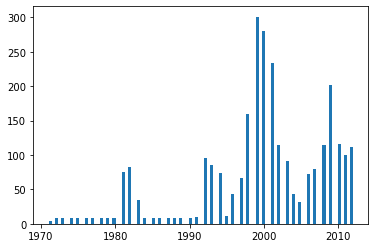

In [52]:
plt.hist(uni_population_growth['Year'], bins=100);

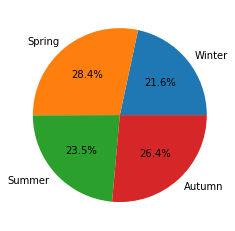

In [53]:
all_seasons = ('Winter', 'Spring', 'Summer','Autumn')
season_counts = (uni_population_growth[uni_population_growth['Season']==1].shape[0],
                 uni_population_growth[uni_population_growth['Season']==2].shape[0],
                 uni_population_growth[uni_population_growth['Season']==3].shape[0],
                 uni_population_growth[uni_population_growth['Season']==4].shape[0])
plt.pie(
season_counts,
labels=all_seasons,
autopct='%1.1f%%',
)
plt.show()

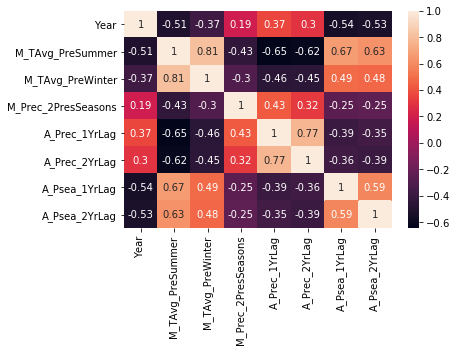

In [54]:
import seaborn as sns
sns.heatmap(uni_population_growth[['Year', 'M_TAvg_PreSummer', 'M_TAvg_PreWinter', 'M_Prec_2PresSeasons', 'A_Prec_1YrLag',
                                   'A_Prec_2YrLag', 'A_Psea_1YrLag', 'A_Psea_2YrLag']].corr(),annot=True)

In [55]:
uni_population_growth.columns

Index(['Year', 'Season', 'AustraliaUTMGrid10Km_Long',
       'AustraliaUTMGrid10Km_Lat', 'TransectLength', 'VegeType',
       'DistPermWater', 'DistAgriLand', 'PercSoilClay', 'M_TAvg_PreSummer',
       'M_TAvg_PreWinter', 'M_Prec_2PresSeasons', 'A_Prec_1YrLag',
       'A_Prec_2YrLag', 'A_Psea_1YrLag', 'A_Psea_2YrLag', 'season_population'],
      dtype='object')

## Data Modeling

In [56]:
uni_population_growth.shape

(2759, 17)

In [57]:
uni_population_growth.dtypes

Year                         float64
Season                       float64
AustraliaUTMGrid10Km_Long    float64
AustraliaUTMGrid10Km_Lat     float64
TransectLength               float64
VegeType                       int64
DistPermWater                float64
DistAgriLand                 float64
PercSoilClay                 float64
M_TAvg_PreSummer             float64
M_TAvg_PreWinter             float64
M_Prec_2PresSeasons          float64
A_Prec_1YrLag                float64
A_Prec_2YrLag                float64
A_Psea_1YrLag                float64
A_Psea_2YrLag                float64
season_population            float64
dtype: object

In [58]:
uni_population_growth['season_population']=uni_population_growth['season_population'].astype(int)
target_column = 'season_population'

feature_columns = ['Year', 'Season', 'AustraliaUTMGrid10Km_Long',
       'AustraliaUTMGrid10Km_Lat', 'TransectLength', 'VegeType',
       'DistPermWater', 'DistAgriLand', 'PercSoilClay', 'M_TAvg_PreSummer',
       'M_TAvg_PreWinter', 'M_Prec_2PresSeasons', 'A_Prec_1YrLag',
       'A_Prec_2YrLag', 'A_Psea_1YrLag', 'A_Psea_2YrLag']

X = uni_population_growth[feature_columns]
y = uni_population_growth[target_column]

# 75% train data, 25% test data
X_train, X_test, y_train, y_test = X.iloc[:2069 , :], X.iloc[2069: , :], y[:2069], y[2069:]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Data Analysis

In [59]:
temp=uni_population_growth[uni_population_growth['season_population']>500]
temp[['Year','Season','TransectLength','season_population']]

,Year,Season,TransectLength,season_population
316,1989.0,4.0,8.0,619
322,1990.0,3.0,8.0,872
335,1991.0,4.0,43.0,1618
336,1992.0,1.0,8.8,897
585,1994.0,4.0,29.0,981


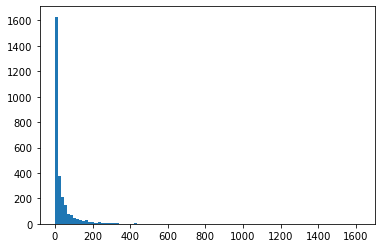

In [60]:
plt.hist(uni_population_growth['season_population'], bins=100);

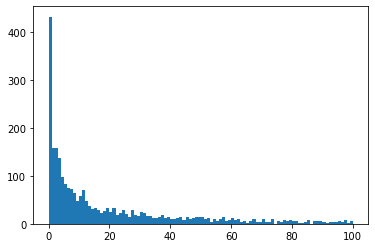

In [61]:
plt.hist(uni_population_growth[uni_population_growth['season_population'] <= 100]['season_population'], bins=100);

# Linear Regression

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

LR = LinearRegression().fit(X_train, y_train)

LR_pred = LR.predict(X_test)
score= LR.score(X_test,y_test)
from sklearn import metrics
print('The MSE is:',metrics.mean_squared_error(y_test, LR_pred, squared=False))
print('The score is:',score)

The MSE is: 76.5270596342961
The score is: -0.3753670431412395


# Linear Regression (Removing outliers)

In [63]:
df2 = uni_population_growth[uni_population_growth['season_population']<250]
temp=uni_population_growth[uni_population_growth['season_population']<250].shape[0]/2759
temp*=100
print('All season_population values w/ values less than 250 account for',temp,"% of the data. Ignore those outliers.")

All season_population values w/ values less than 250 account for 98.44146429865893 % of the data. Ignore those outliers.


In [64]:
X = df2[feature_columns]
y = df2[target_column]

# 75% train data, 25% test data
X_train, X_test, y_train, y_test = X.iloc[:2069 , :], X.iloc[2069: , :], y[:2069], y[2069:]
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform (X_test)

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

Linear = LinearRegression().fit(X_train, y_train)

Linear_pred = Linear.predict(X_test)
score= LR.score(X_test,y_test)
from sklearn import metrics
print('The MSE is:',metrics.mean_squared_error(y_test, Linear_pred, squared=False))
print('The score is:',score)

The MSE is: 49.90948992577248
The score is: -0.7008632319574661


# Logistic Regression

In [66]:
pd.qcut(uni_population_growth.season_population, 3)

0       (24.667, 1618.0]
1       (24.667, 1618.0]
2       (24.667, 1618.0]
3          (4.0, 24.667]
4       (24.667, 1618.0]
              ...       
2754    (24.667, 1618.0]
2755    (24.667, 1618.0]
2756       (-0.001, 4.0]
2757    (24.667, 1618.0]
2758    (24.667, 1618.0]
Name: season_population, Length: 2759, dtype: category
Categories (3, interval[float64]): [(-0.001, 4.0] < (4.0, 24.667] < (24.667, 1618.0]]

In [67]:
uni_population_growth['season_population'] = pd.qcut(uni_population_growth.season_population, 3,\
labels=[0,1,2])
X = uni_population_growth[feature_columns]
y = uni_population_growth[target_column]

# 75% train data, 25% test data
X_train, X_test, y_train, y_test = X.iloc[:2069 , :], X.iloc[2069: , :], y[:2069], y[2069:]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [68]:
uni_population_growth['season_population'].value_counts()

0    983
2    920
1    856
Name: season_population, dtype: int64

In [69]:
from sklearn.linear_model import LogisticRegression
LogR = LogisticRegression()

# Source - https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/
from sklearn.model_selection import GridSearchCV
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
search = GridSearchCV(LogR, space, scoring='accuracy', n_jobs=-1,cv=2)
result = search.fit(X_train, y_train)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.3982320896289444
Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [70]:
from sklearn.metrics import roc_curve, roc_auc_score

LogR = LogisticRegression(C=.001,penalty='l2', solver='newton-cg').fit(X_train,y_train)
lr_probs =LogR.predict_proba(X_test)
lr_auc = roc_auc_score(y_test, lr_probs, multi_class='ovo')
print('Logistic: ROC AUC=%.3f' % (lr_auc))

Logistic: ROC AUC=0.618


# Random Forest Classifier

In [71]:
from sklearn.ensemble import RandomForestClassifier

rfr = RandomForestClassifier(random_state = 1)
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2','sqrt'], 'n_estimators': [3,4,5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}
g_search = GridSearchCV(estimator = rfr, param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 0, return_train_score=True)
result = g_search.fit(X_train, y_train);
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.4422652727820899
Best Hyperparameters: {'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 13}


In [72]:
rfr = RandomForestClassifier(bootstrap=True, max_depth=5, max_features='auto',n_estimators=13).fit(X_train,y_train)
rfr_probs = rfr.predict_proba(X_test)
rfr_auc = roc_auc_score(y_test, rfr_probs, multi_class='ovo')
print('Random Forest: ROC AUC=%.3f' % (rfr_auc))
# rfr_fpr, rfr_tpr, _ = roc_curve(y_test, rfr_probs)
# plt.plot(rfr_fpr, rfr_tpr, marker='.', label='Random Forest Regression')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.legend()
# plt.show()

Random Forest: ROC AUC=0.558


# Test 3 Neural Network (Hyperparameter Tuning needed)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(6, input_dim=14, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# validation_data = (X_test,y_test),
history = model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs=100, batch_size=1000)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Test 4 LSTM model (Hyperparameter Tuning needed)

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import numpy as np

X1_train, y1_train,X1_test,y1_test = np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)
X1_train = np.reshape(X1_train, (X1_train.shape[0],X1_train.shape[1],1))
X1_test = np.reshape(X1_test, (X1_test.shape[0],X1_test.shape[1],1))

model = Sequential()

model.add(LSTM(units = 12, return_sequences = True, input_shape = (X1_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 12, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 12, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 12))
model.add(Dropout(0.2))
model.add(Dense(units = 3))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X1_train, y1_train,validation_data = (X1_test,y1_test), epochs=25, batch_size=1000)

Epoch 1/25
3/3 [==============================] - 12s 1s/step - loss: 3.6621 - accuracy: 0.3143 - val_loss: 2.9674 - val_accuracy: 0.3000
Epoch 2/25
3/3 [==============================] - 0s 146ms/step - loss: 2.9723 - accuracy: 0.3530 - val_loss: 2.0636 - val_accuracy: 0.2667
Epoch 3/25
3/3 [==============================] - 0s 148ms/step - loss: 2.0834 - accuracy: 0.3385 - val_loss: 1.3335 - val_accuracy: 0.3449
Epoch 4/25
3/3 [==============================] - 0s 150ms/step - loss: 1.6133 - accuracy: 0.3533 - val_loss: 1.2053 - val_accuracy: 0.3812
Epoch 5/25
3/3 [==============================] - 0s 146ms/step - loss: 1.4391 - accuracy: 0.3718 - val_loss: 1.1018 - val_accuracy: 0.3797
Epoch 6/25
3/3 [==============================] - 0s 144ms/step - loss: 1.2430 - accuracy: 0.3508 - val_loss: 1.0929 - val_accuracy: 0.3449
Epoch 7/25
3/3 [==============================] - 0s 143ms/step - loss: 1.1914 - accuracy: 0.3453 - val_loss: 1.1133 - val_accuracy: 0.3072
Epoch 8/25
3/3 [======

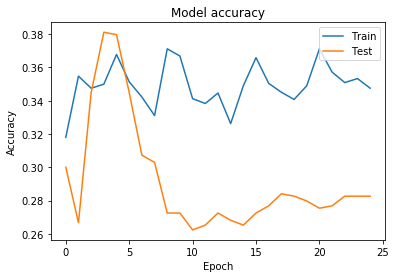

In [74]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Test 5 Decision Tree

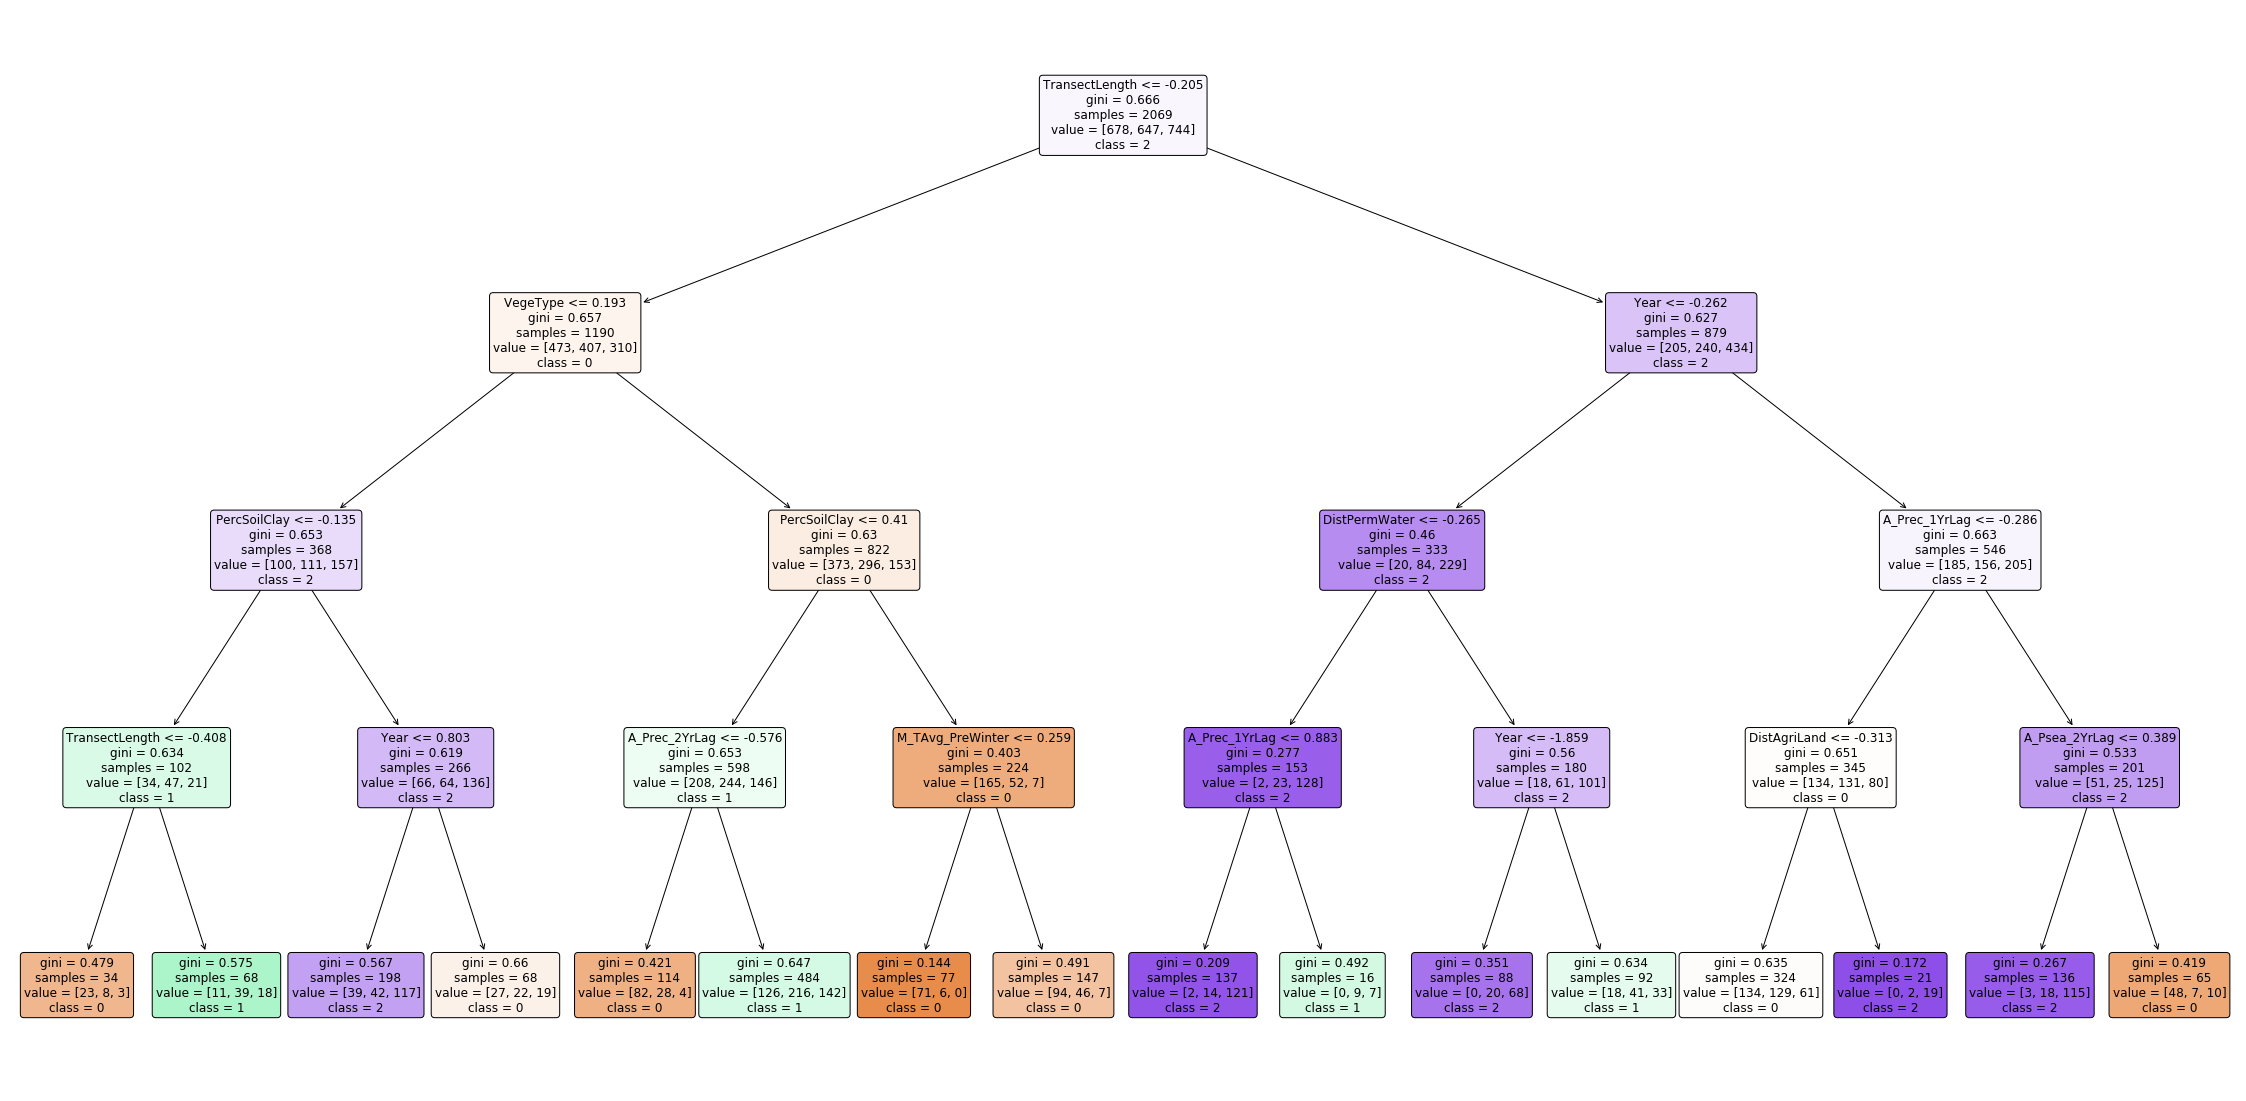

In [75]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train, y_train)

plt.figure(figsize=(40,20))
tree_dot= plot_tree(tree,feature_names=feature_columns,class_names=['0','1','2'],fontsize=12,filled=True,rounded = True)
plt.show()

In [76]:
from sklearn.metrics import confusion_matrix
y_pred2 = rfr.predict(X_test)
print(confusion_matrix(y_test, y_pred2))

[[ 95  22 188]
 [ 62   8 139]
 [ 40   3 133]]


In [78]:
print("Total:",95+22+188+62+8+139+40+3+133)
print("Accuracy is:",(95+8+133)/690)

Total: 690
Accuracy is: 0.34202898550724636


# Test 6 AutoRegressive model

# Test 7 ARIMA model

# Test 8 Quadratic Model

# Test 9 1d Linear Trend Model